In this project, I will try to predict a state's median housing listing price based on time series data and other factors. Predictors may include: median housing prices in the previous 12 months, active listing count in the previous 12 months, other housing factors, as well as the SPY 500 index to reflect the performance of the general economy. I will apply time series analysis and regression models to build a housing price prediction model for each US state.
In some exploratory analysis, I found that while the housing price in some states has a significant seasonal pattern (e.g. plot1, California), the housing price in other states are less affected by seasons (e.g. plot2, Florida). Meanwhile, they both seem to have a close relationship to the stock market, thought the specific pattern might be different. The expected outcome of this project is to provide an accurate housing price prediction tailored for each individual state. I will also try to discuss why certain factor is important to predict housing price in some states, but not the others.

data link: https://www.realtor.com/research/data/
https://finance.yahoo.com/quote/SPY/history/

https://www.imf.org/external/pubs/ft/weo/2017/01/weodata/weorept.aspx?sy=2012&ey=2018&scsm=1&ssd=1&sort=country&ds=.&br=1&pr1.x=30&pr1.y=7&c=111&s=NGDP_R%2CNGDP_RPCH%2CNGDP%2CNGDPD%2CNGDP_D%2CNGDPRPC%2CNGDPPC%2CNGDPDPC%2CNGAP_NPGDP%2CPPPGDP%2CPPPPC%2CPPPSH%2CPPPEX%2CNID_NGDP%2CNGSD_NGDP%2CPCPI%2CPCPIPCH%2CPCPIE%2CPCPIEPCH%2CFLIBOR6%2CTM_RPCH%2CTMG_RPCH%2CTX_RPCH%2CTXG_RPCH%2CLUR%2CLE%2CLP%2CGGR%2CGGR_NGDP%2CGGX%2CGGX_NGDP%2CGGXCNL%2CGGXCNL_NGDP%2CGGSB%2CGGSB_NPGDP%2CGGXONLB%2CGGXONLB_NGDP%2CGGXWDN%2CGGXWDN_NGDP%2CGGXWDG%2CGGXWDG_NGDP%2CNGDP_FY%2CBCA%2CBCA_NGDPD&grp=0&a=#download



Video:
Have you wondered when it is a good time to purchase a house? If you have a small amount of down payment, and you are on a limited budget, have you wished that you could predict how the housing price will go, so that you can make the right decision? You may also realize that the housing markets in different states, or even in different cities, can be completely different, so even if you have a good sense of the market in Maryland, you may totally have no idea for that in Arizona. Can we have a comprehensive analysis and prediction for the housing market across the United States?

Nowadays, we are very lucky that many organizations make their data public, so we can dive into some housing price data and have a better estimate of housing price in the future. The website, Realtor.com has made available a dataset on market trends and montly statistics on active for-sale house listings from 2012 to 2018, including median list price, average list price, and many other information about the housing market. In the mean time, we can also easily get stock market data from the Yahoo website to have a sense of how the general US economic is doing. In this project, I plan to use these available online information and dataset to build accurate prediction models in each US states, and discuss why certain factors may be important or unimportant for a given state. 

So, hopefully when I finish, everybody will know when it's a good time to buy a house!




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_file = 'RDC_InventoryCoreMetrics_State_Hist.csv'
house_data = pd.read_csv(house_file, parse_dates=['Month'])
spy_file = 'SPY_2012_2018.csv'
spy_data = pd.read_csv(spy_file, parse_dates=['Date'])

In [7]:
spy_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-01,139.789993,141.660004,129.550003,131.470001,115.348122,4004156100
1,2012-06-01,129.410004,136.270004,127.139999,136.100006,119.410332,3644886200
2,2012-07-01,136.479996,139.339996,132.600006,137.710007,121.448952,2864743300
3,2012-08-01,138.699997,143.089996,135.580002,141.160004,124.491577,2413590900
4,2012-09-01,141.039993,148.110001,140.130005,143.970001,126.969795,2391233500


In [8]:
house_data.head()

,Month,StateID,State,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,...,Pending Listing Count Y/Y,Median List Price Per Sqft,Median List Price Per Sqft M/M,Median List Price Per Sqft Y/Y,Median Listing Sqft,Median Listing Sqft M/M,Median Listing Sqft Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y
0,2018-09-01,AK,Alaska,280000,-0.0158,0.0182,4010,-0.0436,0.0103,79,...,NaN,165,-0.0014,0.0215,1747,-0.0051,0.0059,323700,-0.0098,0.0119
1,2018-09-01,AL,Alabama,215000,0.0005,0.0804,27971,-0.0149,-0.0751,83,...,4.8571,102,0.0015,0.0811,1985,-0.0018,-0.0151,282800,0.0014,0.0447
2,2018-09-01,AR,Arkansas,182000,0.0111,0.0712,17862,-0.0045,-0.0410,82,...,-0.0887,98,0.0047,0.0480,1957,-0.0041,0.0241,247500,0.0053,0.0700
3,2018-09-01,AZ,Arizona,324200,0.0006,0.0810,29803,0.0194,-0.0808,52,...,0.2148,164,0.0040,0.0830,2046,-0.0039,-0.0020,483600,0.0023,0.0659
4,2018-09-01,CA,California,539900,-0.0048,0.0535,104476,0.0337,0.2075,45,...,0.2571,303,-0.0039,0.0611,1812,-0.0068,-0.0141,953100,-0.0027,0.0086


In [14]:
#get california housing data
ca_house_data = house_data.loc[house_data['StateID']=='CA']
ca_house_data.head()

,Month,StateID,State,Median Listing Price,Median Listing Price M/M,Median Listing Price Y/Y,Active Listing Count,Active Listing Count M/M,Active Listing Count Y/Y,Days on Market,...,Pending Listing Count Y/Y,Median List Price Per Sqft,Median List Price Per Sqft M/M,Median List Price Per Sqft Y/Y,Median Listing Sqft,Median Listing Sqft M/M,Median Listing Sqft Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y
4,2018-09-01,CA,California,539900,-0.0048,0.0535,104476,0.0337,0.2075,45,...,0.2571,303,-0.0039,0.0611,1812,-0.0068,-0.0141,953100,-0.0027,0.0086
55,2018-08-01,CA,California,542500,-0.0118,0.0503,101067,0.0372,0.1424,44,...,0.2678,304,-0.0016,0.0596,1825,-0.0082,-0.0084,955700,-0.0232,0.0141
106,2018-07-01,CA,California,549000,-0.0016,0.0457,97444,0.0569,0.0941,41,...,-0.1123,305,0.0016,0.0453,1840,-0.0105,-0.0065,978400,-0.0172,0.0195
157,2018-06-01,CA,California,549900,0.0016,0.0385,92197,0.0572,0.0699,39,...,-0.0916,304,0.0112,0.0389,1859,-0.0040,-0.0008,995500,-0.0093,0.0902
208,2018-05-01,CA,California,549000,0.0262,0.0437,87211,0.1009,0.0434,37,...,-0.0775,301,0.0178,0.0341,1867,0.0048,-0.0001,1004800,0.0097,0.0312


In [17]:
#merge ca house data and the stock market data
ca_data = pd.merge(spy_data, ca_house_data,
         how='outer', left_on = 'Date', right_on = 'Month')
ca_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,StateID,State,...,Pending Listing Count Y/Y,Median List Price Per Sqft,Median List Price Per Sqft M/M,Median List Price Per Sqft Y/Y,Median Listing Sqft,Median Listing Sqft M/M,Median Listing Sqft Y/Y,Avg Listing Price,Avg Listing Price M/M,Avg Listing Price Y/Y
0,2012-05-01,139.789993,141.660004,129.550003,131.470001,115.348122,4004156100,2012-05-01,CA,California,...,NaN,188.0,0.0214,NaN,1673.0,0.0077,NaN,579061.0,0.0908,NaN
1,2012-06-01,129.410004,136.270004,127.139999,136.100006,119.410332,3644886200,2012-06-01,CA,California,...,NaN,192.0,0.0189,NaN,1688.0,0.0091,NaN,601956.0,0.0395,NaN
2,2012-07-01,136.479996,139.339996,132.600006,137.710007,121.448952,2864743300,2012-07-01,CA,California,...,NaN,194.0,0.0144,NaN,1696.0,0.0044,NaN,614343.0,0.0205,NaN
3,2012-08-01,138.699997,143.089996,135.580002,141.160004,124.491577,2413590900,2012-08-01,CA,California,...,NaN,197.0,0.0135,NaN,1698.0,0.0015,NaN,625900.0,0.0188,NaN
4,2012-09-01,141.039993,148.110001,140.130005,143.970001,126.969795,2391233500,2012-09-01,CA,California,...,NaN,200.0,0.0136,NaN,1700.0,0.0009,NaN,634653.0,0.0139,NaN


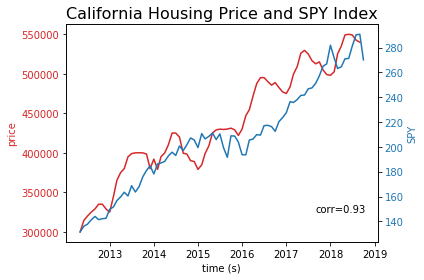

In [43]:
#calculate correlation
ca_corr = ca_data['Median Listing Price'].corr(ca_data['Close'])

#plot stock price and medium list price
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price', color=color)
ax1.plot(ca_data['Date'], ca_data['Median Listing Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SPY', color=color)
ax2.plot(ca_data['Date'], ca_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('California Housing Price and SPY Index', fontsize=16)
fig.tight_layout()
plt.text(0.45, 0.05, 'corr='+("%.2f" % ca_corr), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.show()



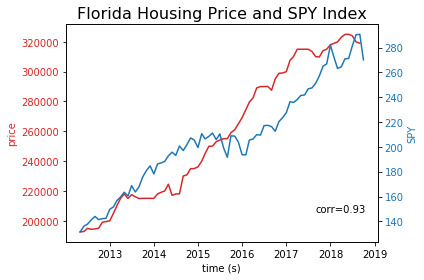

In [44]:
fl_corr = fl_data['Median Listing Price'].corr(fl_data['Close'])
#get florida housing data
fl_house_data = house_data.loc[house_data['StateID']=='FL']
#merge fl house data and the stock market data
fl_data = pd.merge(spy_data, fl_house_data,
         how='outer', left_on = 'Date', right_on = 'Month')

#plot stock price and medium list price
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('price', color=color)
ax1.plot(fl_data['Date'], fl_data['Median Listing Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('SPY', color=color)
ax2.plot(fl_data['Date'], fl_data['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Florida Housing Price and SPY Index', fontsize=16)
fig.tight_layout()
plt.text(0.45, 0.05, 'corr='+("%.2f" % fl_corr), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.show()

